In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'C:/Users/Demi/Desktop/TB2/Mini project/fake_transactional_data_24 (1).csv'
data = pd.read_csv(file_path)

In [3]:
from datetime import datetime

data['weekday'] = data['not_happened_yet_date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y").strftime("%A"))
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,weekday
0,10371.0,4.00,CINEMA,01/01/2025,Wednesday
1,88339.0,2.40,40544,01/01/2025,Wednesday
2,18555.0,2.40,85149,01/01/2025,Wednesday
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Wednesday
4,80792.0,1.95,18555,01/01/2025,Wednesday
...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Wednesday
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Wednesday
10148277,57569.0,14.00,WINE_BAR,31/12/2025,Wednesday
10148278,1490.0,9.00,57569,31/12/2025,Wednesday


In [4]:
data_merchant = data[data['to_randomly_generated_account'].astype(str).str.isnumeric() == False]

## 观察异常值补

In [6]:
categories_path = 'C:/Users/Demi/0-Mini Project/finalised_merchant_categories.xlsx'
merchant_categories = pd.read_excel(categories_path)

categories = merchant_categories.columns
category_account_pairs = []
for category in categories:
    stores = merchant_categories[category].dropna().apply(lambda x: x.strip("'"))
    for store in stores:
        category_account_pairs.append({'store': store, 'category': category})

category_df = pd.DataFrame(category_account_pairs)

In [7]:
data_catagory = data_merchant.merge(category_df, left_on='to_randomly_generated_account', right_on='store', how='left')
data_catagory.drop(['store', 'to_randomly_generated_account', 'not_happened_yet_date'], axis=1, inplace=True)
data_catagory

,from_totally_fake_account,monopoly_money_amount,weekday,category
0,10371.0,4.00,Wednesday,Cinema
1,18555.0,4.10,Wednesday,Café
2,18555.0,4.45,Wednesday,Café
3,18555.0,1.45,Wednesday,Café
4,18555.0,5.00,Wednesday,Café
...,...,...,...,...
7615512,81404.0,1.80,Wednesday,Café
7615513,32185.0,2.65,Wednesday,Café
7615514,32185.0,2.45,Wednesday,Café
7615515,57569.0,14.00,Wednesday,Bar


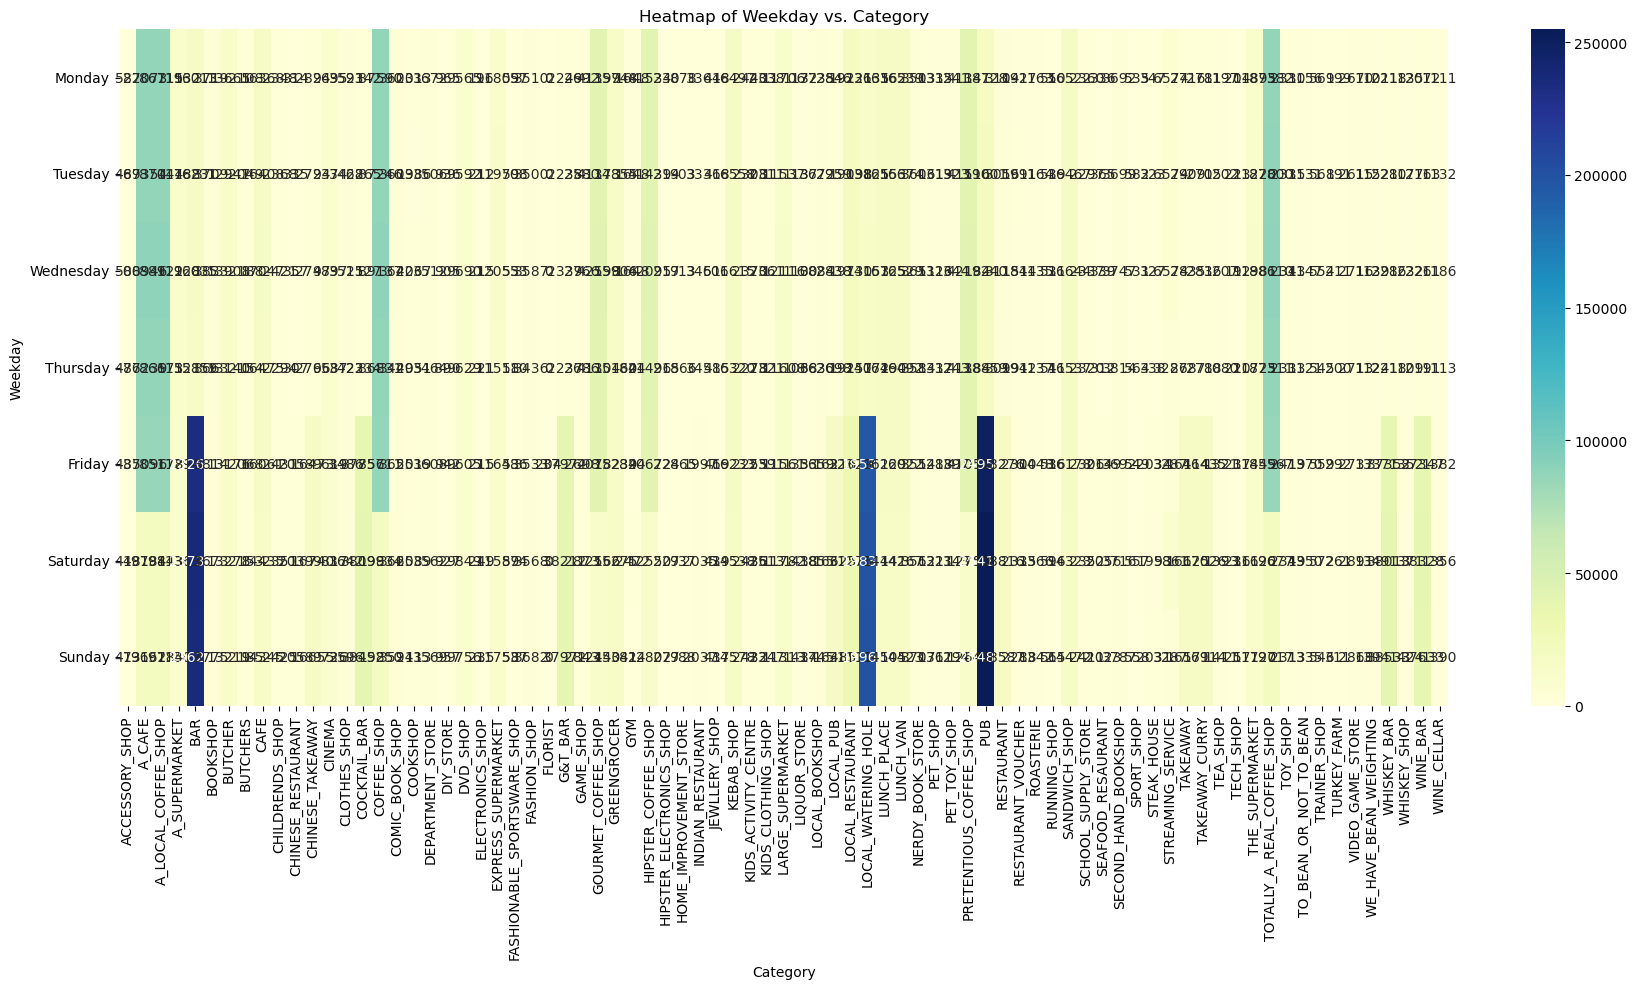

In [8]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
contingency_table = pd.crosstab(data_merchant['weekday'], data_merchant['to_randomly_generated_account']).reindex(weekday_order)

plt.figure(figsize=(18, 10))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d', annot_kws={"size": 10})
plt.title('Heatmap of Weekday vs. Category')
plt.ylabel('Weekday')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.tight_layout() 
plt.show()

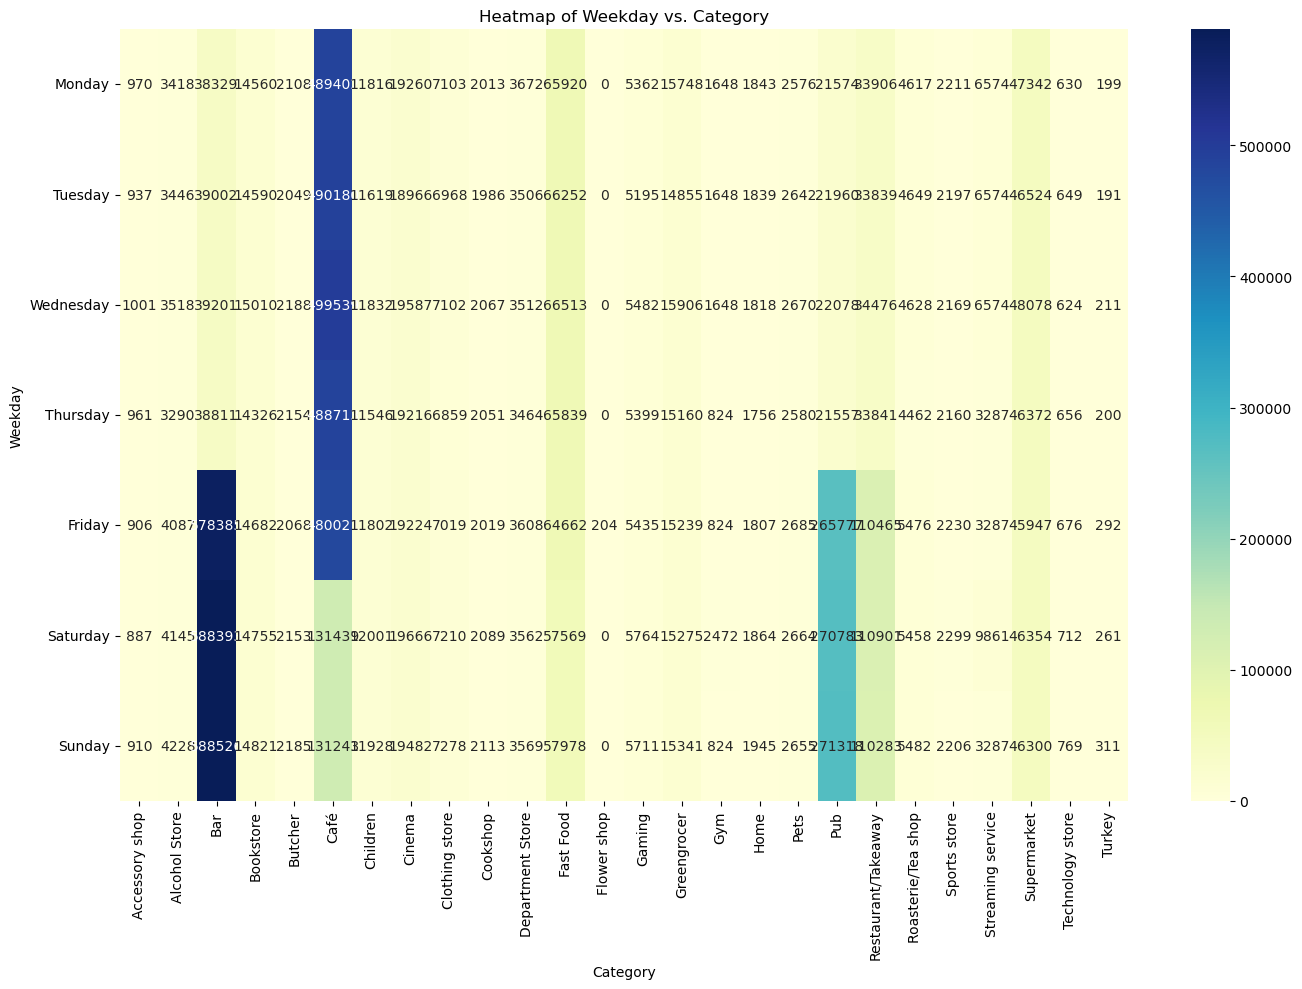

In [9]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
contingency_table2 = pd.crosstab(data_catagory['weekday'], data_catagory['category']).reindex(weekday_order)

plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table2, annot=True, cmap="YlGnBu", fmt='d', annot_kws={"size": 10})
plt.title('Heatmap of Weekday vs. Category')
plt.ylabel('Weekday')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.tight_layout() 
plt.show()

# Feature 3

In [10]:
data_customer2 = data_catagory.groupby(['from_totally_fake_account', 'weekday', 'category']).agg(
    Transaction_Amount=('monopoly_money_amount', 'sum'),
    Transaction_Count=('monopoly_money_amount', 'count')
).reset_index()

In [11]:
data_customer = data_catagory.groupby(['from_totally_fake_account', 'category']).agg(
    Transaction_Amount=('monopoly_money_amount', 'sum'),
    Transaction_Count=('monopoly_money_amount', 'count')
).reset_index()
data_customer

,from_totally_fake_account,category,Transaction_Amount,Transaction_Count
0,1000.0,Alcohol Store,114.98,3
1,1000.0,Bar,3081.00,259
2,1000.0,Bookstore,8.00,1
3,1000.0,Café,1955.20,813
4,1000.0,Children,160.00,2
...,...,...,...,...
129368,100988.0,Pub,1716.28,94
129369,100988.0,Restaurant/Takeaway,1474.72,98
129370,100988.0,Roasterie/Tea shop,116.37,4
129371,100988.0,Supermarket,1366.12,14


In [12]:
# normalized
pivot_amount_new = data_customer.pivot(index='from_totally_fake_account', columns='category', values='Transaction_Amount').fillna(0)
pivot_count_new = data_customer.pivot(index='from_totally_fake_account', columns='category', values='Transaction_Count').fillna(0)

from sklearn.preprocessing import StandardScaler

scaler_amount_new = StandardScaler()
features_amount_scaled_new = scaler_amount_new.fit_transform(pivot_amount_new)
df_features_amount_scaled_new = pd.DataFrame(features_amount_scaled_new, columns=pivot_amount_new.columns, index=pivot_amount_new.index)
df_features_amount_scaled_new.columns = [f"{col}_Amount" for col in df_features_amount_scaled_new.columns]

scaler_count_new = StandardScaler()
features_count_scaled_new = scaler_count_new.fit_transform(pivot_count_new)
df_features_count_scaled_new = pd.DataFrame(features_count_scaled_new, columns=pivot_count_new.columns, index=pivot_count_new.index)
df_features_count_scaled_new.columns = [f"{col}_Count" for col in df_features_count_scaled_new.columns]

df_scaled = pd.concat([df_features_amount_scaled_new, df_features_count_scaled_new], axis=1)
df_scaled

,Accessory shop_Amount,Alcohol Store_Amount,Bar_Amount,Bookstore_Amount,Butcher_Amount,Café_Amount,Children_Amount,Cinema_Amount,Clothing store_Amount,Cookshop_Amount,...,Home_Count,Pets_Count,Pub_Count,Restaurant/Takeaway_Count,Roasterie/Tea shop_Count,Sports store_Count,Streaming service_Count,Supermarket_Count,Technology store_Count,Turkey_Count
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,-0.209904,0.436094,0.976814,-0.671664,-0.611030,1.577195,-0.523225,1.237585,-0.580847,-0.536834,...,0.117692,3.284373,-0.272749,-0.490542,-0.526815,-0.414113,1.215332,-1.613059,-0.330826,-0.507014
1002.0,-0.209904,1.030108,-0.139304,-0.710576,-0.611030,-0.484581,-0.381506,1.722139,-0.733514,-0.536834,...,-0.444003,-0.397803,0.277048,-0.490542,-0.526815,0.021733,1.215332,-1.462549,-0.330826,-0.507014
1006.0,-0.209904,0.331669,-0.676295,1.293403,3.072809,1.746388,1.208895,1.025062,-0.665077,2.070246,...,-0.163155,-0.397803,0.460313,-0.255703,-1.355991,-0.414113,1.215332,0.243227,-0.330826,-0.507014
1018.0,-0.209904,-0.677813,-1.746358,-0.613296,-0.171673,-1.116727,-0.655758,-0.666624,1.381712,-0.536834,...,-0.163155,-0.222461,0.613035,-0.255703,-0.941403,-0.196190,-0.822821,0.795096,-0.330826,-0.507014
1053.0,-0.209904,1.401459,-0.353905,-0.710576,-0.306860,-0.145354,-0.558654,0.982557,1.962899,-0.536834,...,2.645321,-0.397803,0.063238,1.529068,-0.112227,-0.196190,1.215332,-1.362210,0.240333,-0.507014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100931.0,-0.209904,2.886569,1.315863,0.933465,-0.611030,-0.266977,-0.503541,1.943163,-0.733514,-0.536834,...,-0.444003,-0.397803,1.926438,-0.349639,1.546125,4.162271,1.215332,0.544247,0.811492,-0.507014
100934.0,-0.209904,0.124158,0.462361,1.808989,-0.611030,-0.323235,-0.733179,0.668023,-0.528203,-0.536834,...,-0.444003,-0.397803,-0.425470,-0.678412,-0.526815,-0.414113,1.215332,1.196455,-0.330826,-0.507014
100947.0,-0.209904,-0.098950,1.519685,1.035609,-0.154775,-0.100306,-0.575713,1.620128,-0.595587,0.478003,...,-0.444003,-0.397803,0.063238,1.669971,-0.526815,-0.196190,1.215332,0.995776,0.240333,-0.507014


## K-Mean

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

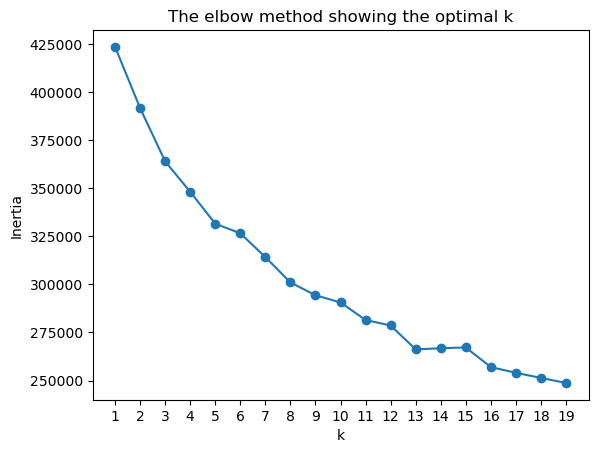

In [14]:
k_values = range(1, 20)
inertias  = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.title('The elbow method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

In [15]:
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, The average silhouette_score is : 0.08476480923935115
For n_clusters = 3, The average silhouette_score is : 0.09501787941514968
For n_clusters = 4, The average silhouette_score is : 0.09325615781677765
For n_clusters = 5, The average silhouette_score is : 0.08185601135380148
For n_clusters = 6, The average silhouette_score is : 0.07425033447270245
For n_clusters = 7, The average silhouette_score is : 0.07372701290626436
For n_clusters = 8, The average silhouette_score is : 0.0798295817688225
For n_clusters = 9, The average silhouette_score is : 0.07678377978238529
For n_clusters = 10, The average silhouette_score is : 0.08343946318807455
For n_clusters = 11, The average silhouette_score is : 0.0802419027233388
For n_clusters = 12, The average silhouette_score is : 0.08966148647718171
For n_clusters = 13, The average silhouette_score is : 0.08311503055192515
For n_clusters = 14, The average silhouette_score is : 0.09641445623244285
For n_clusters = 15, The average si

k = 14

## PCA

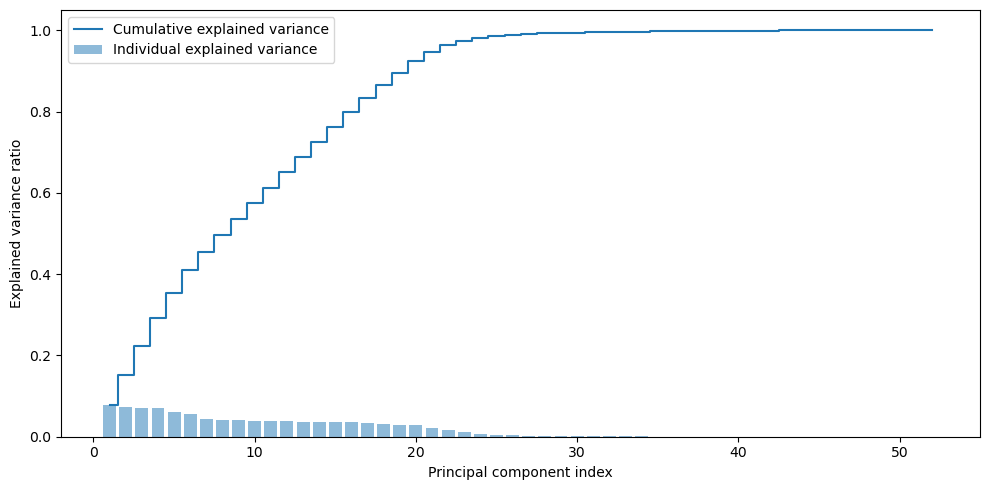

Cumulative Variance Explained by each component: 
 [0.07759872 0.15181552 0.22329196 0.29281566 0.35445374 0.4098183
 0.4535871  0.49528443 0.53522429 0.57446466 0.6132173  0.65118458
 0.68863939 0.7260467  0.76314432 0.7995318  0.83341694 0.8649344
 0.89482358 0.92438943 0.94671606 0.96269514 0.97339736 0.98083399
 0.98605324 0.98934429 0.9912317  0.99262396 0.99358847 0.99452056
 0.99523343 0.99590882 0.99654471 0.99709258 0.99751927 0.99793154
 0.9982886  0.99861244 0.99887854 0.99913852 0.99929722 0.99943473
 0.99955795 0.99967504 0.9997905  0.99989089 0.99994285 0.99999061
 0.99999553 1.         1.         1.        ]


In [28]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


# 绘制每个主成分的解释的方差比例和累积解释的方差比例
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 打印累积方差解释率
print("Cumulative Variance Explained by each component: \n", cumulative_variance_ratio)

In [36]:
pca = PCA(n_components=18)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(18)])

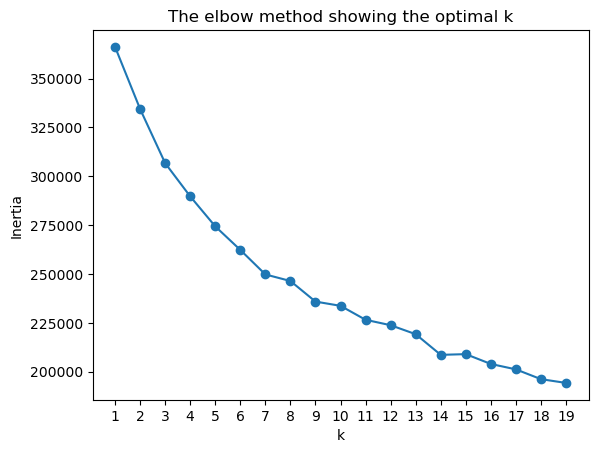

In [34]:
k_values = range(1, 20)
inertias  = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.title('The elbow method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

In [37]:
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    clusters = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, The average silhouette_score is : 0.08476480923935115
For n_clusters = 3, The average silhouette_score is : 0.09501787941514968
For n_clusters = 4, The average silhouette_score is : 0.08664803751919621
For n_clusters = 5, The average silhouette_score is : 0.0818446908699747
For n_clusters = 6, The average silhouette_score is : 0.09468141677117808
For n_clusters = 7, The average silhouette_score is : 0.09139741661790726
For n_clusters = 8, The average silhouette_score is : 0.0712378843661825
For n_clusters = 9, The average silhouette_score is : 0.07550541478009858
For n_clusters = 10, The average silhouette_score is : 0.07733546423561989
For n_clusters = 11, The average silhouette_score is : 0.06897051539291747
For n_clusters = 12, The average silhouette_score is : 0.07585496972358062
For n_clusters = 13, The average silhouette_score is : 0.07744226725039402
For n_clusters = 14, The average silhouette_score is : 0.07341861497529222
For n_clusters = 15, The average si

k = 6

In [ ]:
df_scaled.to_csv('df_scaled.csv')